In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [2]:
#Data exploration
# Display the first few rows of the dataset
print(df.head())

# Check basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [3]:
# Identify numerical columns for imputation
numeric_columns = df.select_dtypes(include=['number']).columns

# Impute missing values for numerical columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Remove outliers using z-score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[numeric_columns]))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

# Encode categorical variables (if any)
# For example, using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Choose relevant features
relevant_features = [
    'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
    'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
    'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
    'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'
]

# Extract selected features and target variable from the DataFrame
X = df[relevant_features]  # Features
y = df['Heart Attack Risk']  # Target variable

# Initialize the machine learning model (Random Forest) for feature selection
model = RandomForestClassifier()

# Initialize the RFE selector with the model and desired number of features to select
rfe = RFE(model, n_features_to_select=10)  # Adjust the number of features as needed

# Fit the RFE selector to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)


KeyError: "['Sex', 'Blood Pressure'] not in index"

In [5]:
#Data exploration
# Display the first few rows of the dataset
print(df.head())

# Check basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389          98         1               1        1        1   
2   21          324          72         1               0        0        0   
3   84          383          73         1               1        1        0   
4   66          318          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  ...  \
0                    0                 4.168189                        0  ...   
1                    1                 1.813242                        1  ...   
2                    0                 2.078353                        1  ...   
3                    1                 9.828130                        1  ...   
4                    0                 5.804299                        1  ...   

   Country_United States  Country_Viet

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Define the target variable
target_variable = 'Heart Attack Risk'

# Extract features (X) and target variable (y)
X = df.drop(target_variable, axis=1)  # Features
y = df[target_variable]  # Target variable

# Initialize the machine learning model (Random Forest) for feature selection
model = RandomForestClassifier()

# Initialize the feature selector
selector = SelectFromModel(estimator=model, max_features=10)  # Adjust max_features as needed

# Fit the selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week'],
      dtype='object')


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
print("Model Performance Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance Metrics:

Logistic Regression:
Accuracy: 0.6418
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Decision Tree:
Accuracy: 0.5282
Precision: 0.3572
Recall: 0.3965
F1-score: 0.3758

Random Forest:
Accuracy: 0.6315
Precision: 0.3846
Recall: 0.0478
F1-score: 0.0850

SVM:
Accuracy: 0.6418
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.model_selection import cross_validate

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Perform cross-validation for each classifier
cv_results = {}
for name, clf in classifiers.items():
    scores = cross_validate(clf, X[selected_features], y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_results[name] = scores

# Display cross-validation results
for name, scores in cv_results.items():
    print(f"\n{name} Cross-Validation Results:")
    print("Accuracy:", scores['test_accuracy'].mean())
    print("Precision:", scores['test_precision'].mean())
    print("Recall:", scores['test_recall'].mean())
    print("F1-score:", scores['test_f1'].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin


Logistic Regression Cross-Validation Results:
Accuracy: 0.6417893526296734
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Decision Tree Cross-Validation Results:
Accuracy: 0.5414815306832124
Precision: 0.3631465718422858
Recall: 0.371451355661882
F1-score: 0.3672016696523423

Random Forest Cross-Validation Results:
Accuracy: 0.6254702961915255
Precision: 0.3331297350005704
Recall: 0.045552067778014814
F1-score: 0.07988286561588526

SVM Cross-Validation Results:
Accuracy: 0.6417893526296734
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd
import numpy as np

# Load the dataset (replace 'dataset.csv' with the actual file path)
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Impute missing values with median for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Remove outliers using Interquartile Range (IQR) method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Check if any missing values remain
print(df.isnull().sum())

# Check summary statistics after preprocessing
print(df.describe())

# Check the shape of the DataFrame after preprocessing
print(df.shape)


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64
               Age  Chole

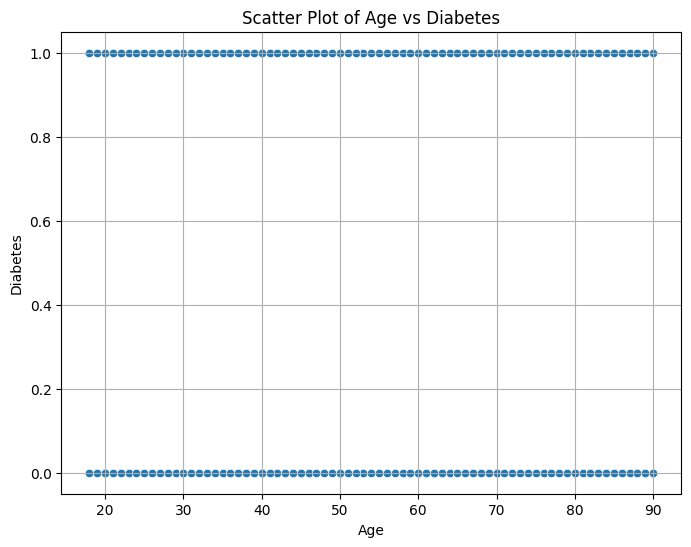

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features to compare (replace 'Age' and 'Diabetes' with actual feature names)
feature1 = 'Age'
feature2 = 'Diabetes'

# Plot a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=feature1, y=feature2)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.show()

